# Respostas Desafios Aula 2

Este notebook contém os as respostas dos desafios da Aula 1 do treinamento da alura. QuarentenaDados

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

importando filmes

In [2]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


importando alaliações

In [3]:
#avaliacoes é um dataframe
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Renomenado colunas

In [4]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
#Agrupando por filme
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()

#Realizando join com dataframe 'filmes'
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()


,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Renomeando colunas

In [6]:
filmes_com_media.columns =  ["filmeId", "titulo", "generos", "nota_média"]

filmes_com_media.head(5)

,filmeId,titulo,generos,nota_média
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

# Desafios

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

Gráfico para alterar

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


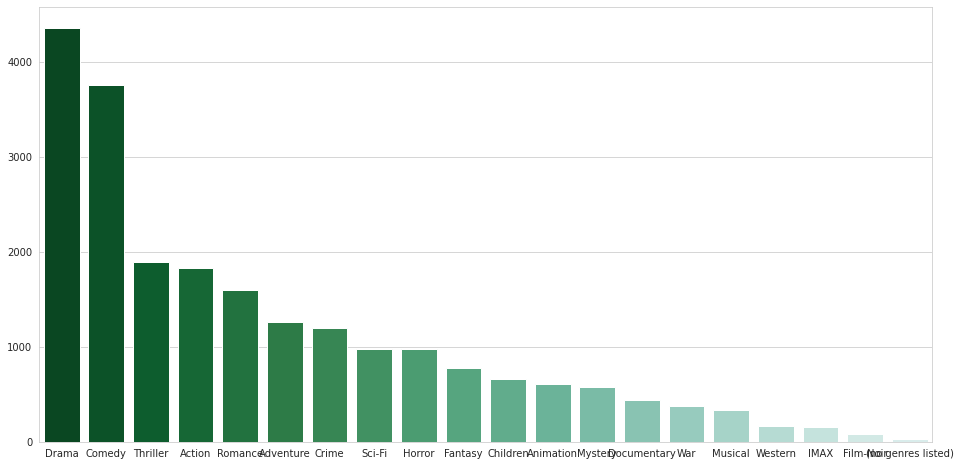

In [8]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

**Solução**

fonte: https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot

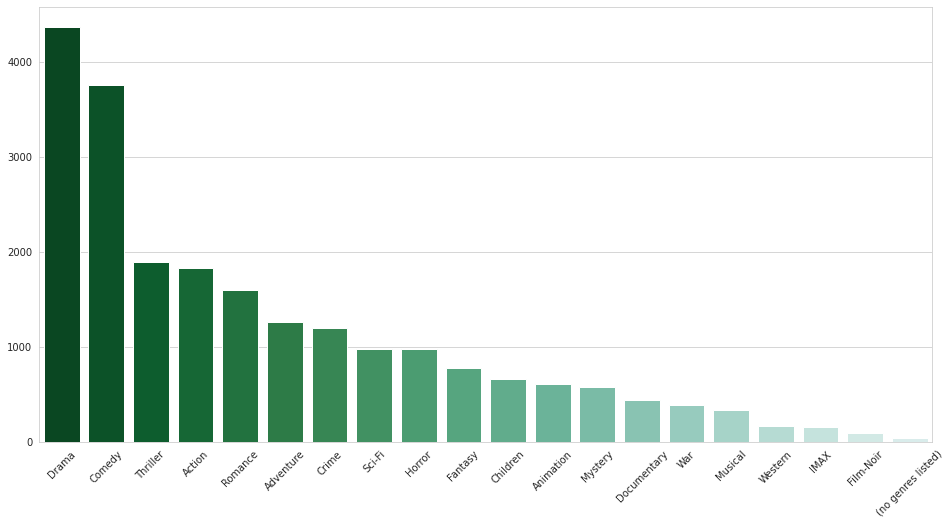

In [9]:

plt.figure(figsize=(16,8))
obj_sns_barplot = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

#obj_sns_barplot.set_xticklabels(<lista de rótulos>, rotation=<rotação em graus>)
obj_sns_barplot.set_xticklabels(filmes_por_genero.index, rotation=45, )

plt.show() 

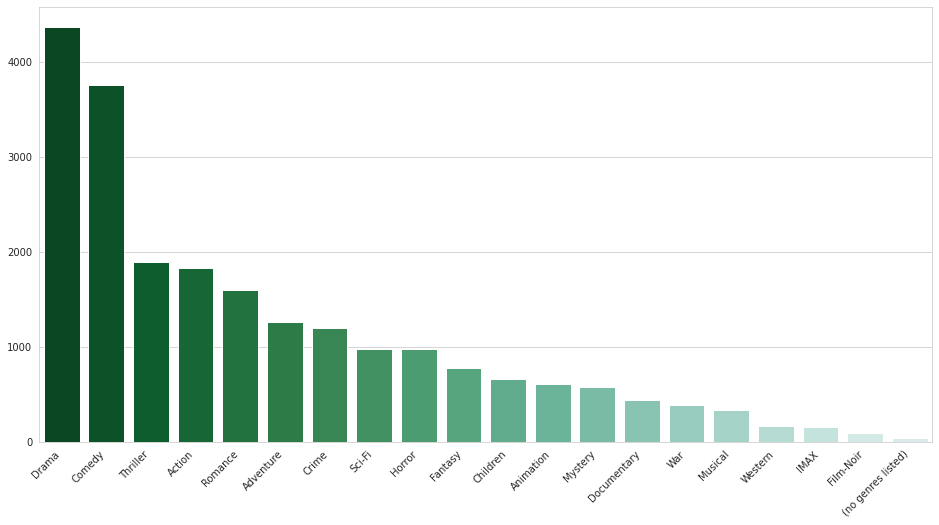

In [10]:
plt.figure(figsize=(16,8))
obj_sns_barplot = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))

#obj_sns_barplot.set_xticklabels(<lista de rótulos>, rotation=<rotação em graus>, horizontalalignment=<referencia do ponto de rotação>)
obj_sns_barplot.set_xticklabels(obj_sns_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.show() 

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

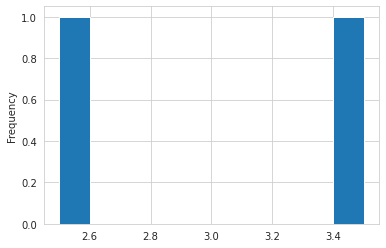

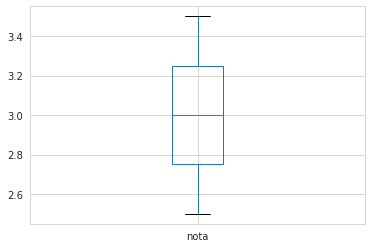

count    2.000000
mean     3.000000
std      0.707107
min      2.500000
25%      2.750000
50%      3.000000
75%      3.250000
max      3.500000
Name: nota, dtype: float64

In [11]:
plot_filme(72294)

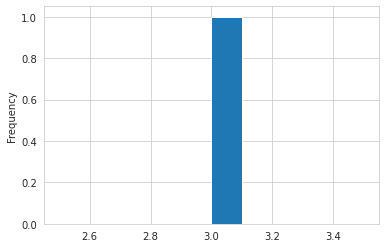

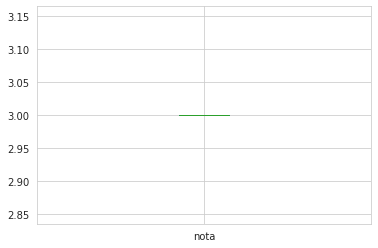

count    1.0
mean     3.0
std      NaN
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: nota, dtype: float64

In [12]:
plot_filme(4927)

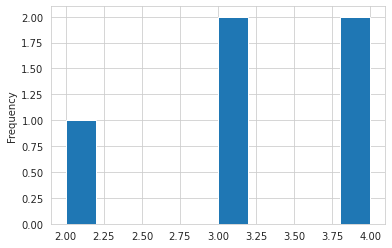

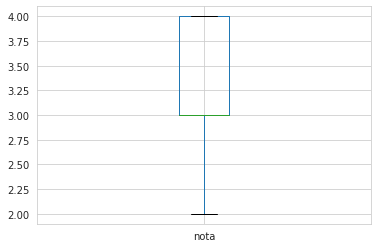

count    5.00000
mean     3.20000
std      0.83666
min      2.00000
25%      3.00000
50%      3.00000
75%      4.00000
max      4.00000
Name: nota, dtype: float64

In [13]:
plot_filme(96417)

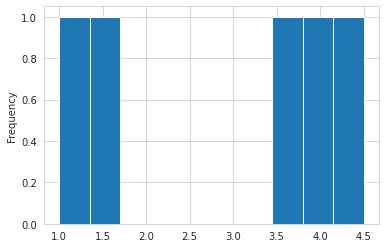

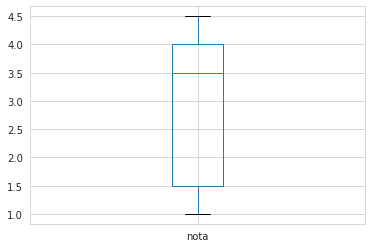

count    5.000000
mean     2.900000
std      1.557241
min      1.000000
25%      1.500000
50%      3.500000
75%      4.000000
max      4.500000
Name: nota, dtype: float64

In [14]:
plot_filme(165549)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
#Copiando dataset
dtf_avaliacoes_copia1 = avaliacoes.copy()

#Gerando série com o total de avaliações
dtf_avaliacoes_copia1["avaliacao"] = 1

serie_avalicaoes_p_filme = dtf_avaliacoes_copia1.groupby(by="filmeId")["avaliacao"].count()

#Gerando série dos 10 filmes avaliados
serie_avalicaoes_p_filme_10 = serie_avalicaoes_p_filme.sort_values(ascending=False)[0:10]

In [16]:
serie_avalicaoes_p_filme_10 

filmeId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: avaliacao, dtype: int64

Considerando o total de avaliações dos 10 mais avaliados, pode - se agrupar os dados em 3 grupos de acordo com a variação do número de avaliações. Diferença entre grupo variando aproximadamente 30 mais ou menos avaliações.

*Grupo 1*: Os 3 primeiros filmes.  
*Grupo 2*: Os 4º e 5º filme.  
*Grupo 3*: Do 6º ao 10º filme.  

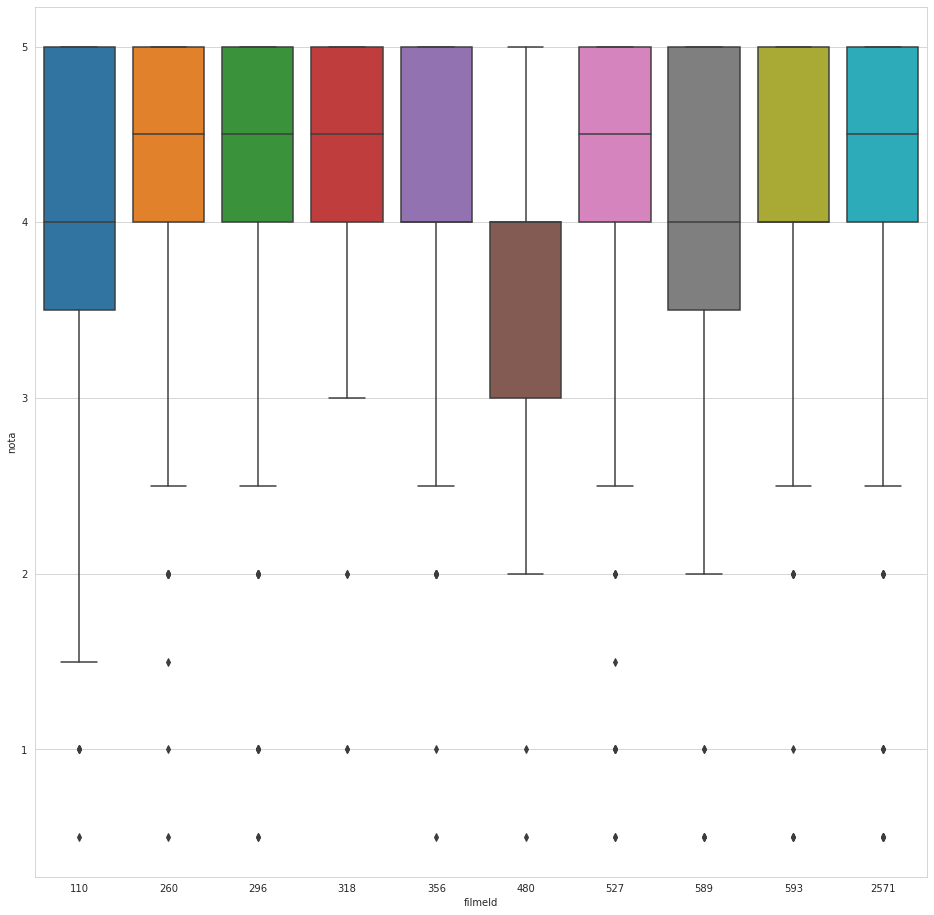

In [17]:

plt.figure(figsize=(16,16))

sns.boxplot(data = avaliacoes.query("filmeId in @serie_avalicaoes_p_filme_10.index "), x ="filmeId", y="nota")

plt.show()

Poucas pessoas deram notas abaixo de 2 para os filmes. 

Os filmes de Id 260, 296, 318, 527  2571, metade de seus respectivos avaliadores os avaliaram com nota acima de 4 (6º, 3º, 2º, 10º, 5º respectivamente.). Nesse grupo, o filme de de Id 318 , segundo filme mais popular desse grupo, 75% das notas foram igual ou acima de 3, paraoutros filmes esse limite é de 2,5 aproximadamente. Todo tem a mediana semelhante a 4,5. 

O filme de Id 356, mais popular, 50% das notas estão entre 4 e 5, assim como o filme 593, 4º filme mais popular. Ambos possuem 75% das notas acima ou igual a 2,5 aproximadamente e não possuem um agrupamento de dados bem definido perto da mediana. 

O filme de id 480 (7º filme mais avaliado):
50% das notas 3 e 4. Não possui um agrupamento de dados bem definido perto da mediana. Diferente dos demais filmes do gráfico. 50% das avaliaçãoes não estão próximas do limite de 75%.

O filme de id 110 (8º filme mais avaliado):
50% das notas estão entre 3,5 e 5. A mediana é 4. O primeiro quartil começa em 1,5 aproximadamente, o menor limite entrre todos os filmes.

O filme de id 589 (9º filme mais avaliado):
Possui a distribuição de dados e mediana semelhante ao filme de id 110 com a diferença que o primeiro quartil começa em 2 aproximadamente.


## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

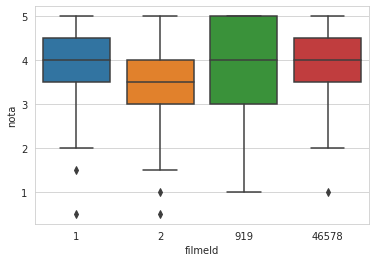

In [18]:
#Gráfico original

sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

In [19]:
#Selecionando avaliações e filmes específicos
dtf_avaliacoes_selecao1 = avaliacoes.query("filmeId in [1,2,919,46578]")

dtf_filmes_selecao1  = filmes[["filmeId", "titulo"]]

dtf_filmes_selecao1 = dtf_filmes_selecao1.query("filmeId in [1,2,919,46578]")

dtf_filmes_selecao1

,filmeId,titulo
0,1,Toy Story (1995)
1,2,Jumanji (1995)
701,919,"Wizard of Oz, The (1939)"
6242,46578,Little Miss Sunshine (2006)


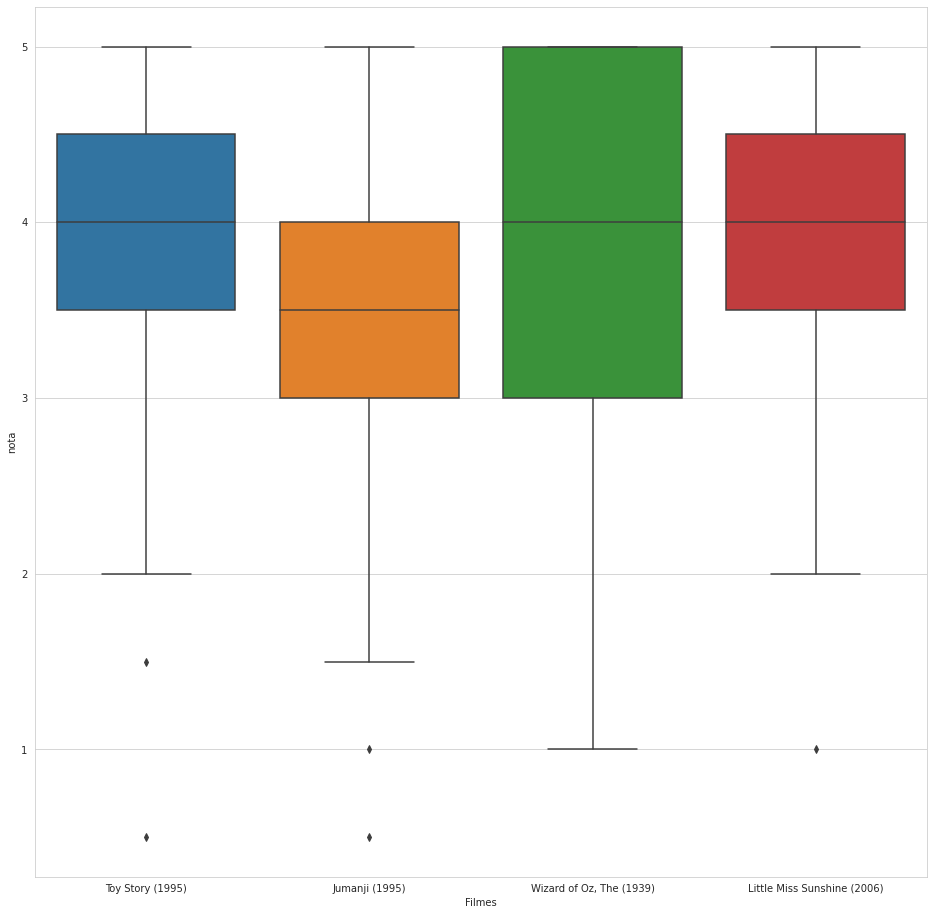

In [20]:
#Imprimindo figuras
plt.figure(figsize=(16,16))
obj_boxplot = sns.boxplot(data = dtf_avaliacoes_selecao1, x =dtf_avaliacoes_selecao1.filmeId , y="nota")

obj_boxplot.set_xticklabels(dtf_filmes_selecao1.titulo)
obj_boxplot.set( xlabel='Filmes')

plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [21]:
#https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value

dtf_avaliacoes_media_mediana_moda = avaliacoes.copy()

serie_avalicaoes_media = dtf_avaliacoes_media_mediana_moda.groupby(by="filmeId")["nota"].mean()
serie_avalicaoes_mediana = dtf_avaliacoes_media_mediana_moda.groupby(by="filmeId")["nota"].median()
serie_avalicaoes_moda = dtf_avaliacoes_media_mediana_moda.groupby(by="filmeId")["nota"].agg(pd.Series.mode)

serie_avalicaoes_media.name = "media"
serie_avalicaoes_mediana.name = "mediana"
serie_avalicaoes_moda.name = "moda"

#Realizando joins necessários com dataframe 'filmes'
filmes_com_media_mediana_moda = filmes.join(serie_avalicaoes_media, on="filmeId")
filmes_com_media_mediana_moda = filmes_com_media_mediana_moda.join(serie_avalicaoes_mediana, on="filmeId")
filmes_com_media_mediana_moda = filmes_com_media_mediana_moda.join(serie_avalicaoes_moda, on="filmeId")

filmes_com_media_mediana_moda.head()

,filmeId,titulo,generos,media,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0,4
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.5,4
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.0,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,3.0,3
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0,3


In [0]:
filmes_com_media_mediana_moda = filmes_com_media_mediana_moda.sort_values(by="media", ascending=False)

#filmes_com_media_mediana_moda5 = filmes_com_media_mediana_moda.query("media  == 5.0")
#filmes_com_media_mediana_moda3 = filmes_com_media_mediana_moda.query("media == 3.0")
#filmes_com_media_mediana_moda0_5 = filmes_com_media_mediana_moda.query("media == 0.5")

filmes_com_media_mediana_moda5 = filmes_com_media_mediana_moda.query("media  >= 4.8")
filmes_com_media_mediana_moda3 = filmes_com_media_mediana_moda.query("media in (3.0, 2.9, 2.8, 3.1, 3.2)")
filmes_com_media_mediana_moda0_5 = filmes_com_media_mediana_moda.query("media >= 0.5 & media <= 1.0")

In [23]:
filmes_com_media_mediana_moda5

,filmeId,titulo,generos,media,mediana,moda
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.000000,5.0,5
8107,100556,"Act of Killing, The (2012)",Documentary,5.000000,5.0,5
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.000000,5.0,5
9094,143511,Human (2015),Documentary,5.000000,5.0,5
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.000000,5.0,5
...,...,...,...,...,...,...
4109,5889,"Cruel Romance, A (Zhestokij Romans) (1984)",Drama|Romance,5.000000,5.0,5
3807,5328,Rain (2001),Drama|Romance,5.000000,5.0,5
4396,6460,"Trial, The (Procès, Le) (1962)",Drama,4.900000,5.0,5
5580,26810,Bad Boy Bubby (1993),Drama,4.833333,5.0,5


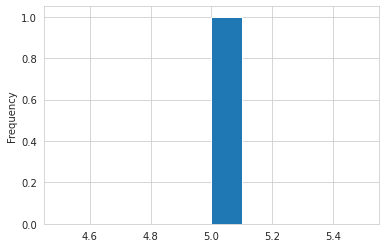

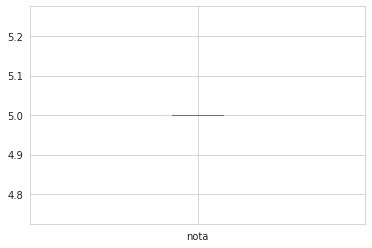

count    1.0
mean     5.0
std      NaN
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: nota, dtype: float64

In [24]:
plot_filme(5059)

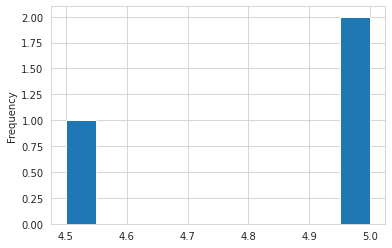

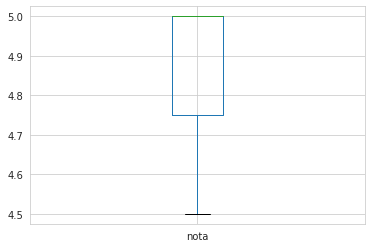

count    3.000000
mean     4.833333
std      0.288675
min      4.500000
25%      4.750000
50%      5.000000
75%      5.000000
max      5.000000
Name: nota, dtype: float64

In [52]:
plot_filme(26810)

In [25]:
filmes_com_media_mediana_moda3

,filmeId,titulo,generos,media,mediana,moda
3209,4333,Throw Momma from the Train (1987),Comedy|Crime,3.2,3.75,4
6604,55577,Saw IV (2007),Crime|Horror|Thriller,3.2,3.00,2.5
7533,84772,Paul (2011),Adventure|Comedy|Sci-Fi,3.2,3.50,3
2508,3355,"Ninth Gate, The (1999)",Fantasy|Horror|Mystery|Thriller,3.2,3.50,4
3147,4234,"Tailor of Panama, The (2001)",Drama|Thriller,3.2,3.00,3
...,...,...,...,...,...,...
2974,3986,"6th Day, The (2000)",Action|Sci-Fi|Thriller,2.8,2.75,4
2378,3156,Bicentennial Man (1999),Drama|Romance|Sci-Fi,2.8,3.00,3
161,190,Safe (1995),Thriller,2.8,3.00,3
3585,4915,"Beastmaster, The (1982)",Action|Adventure|Fantasy,2.8,2.00,2


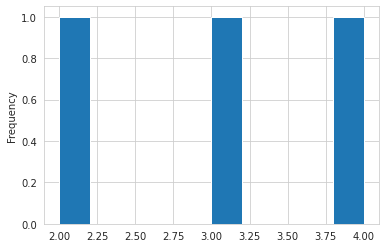

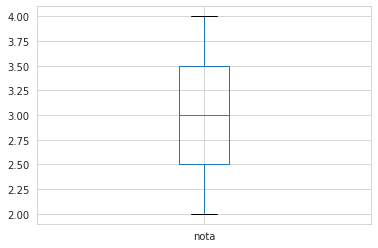

count    3.0
mean     3.0
std      1.0
min      2.0
25%      2.5
50%      3.0
75%      3.5
max      4.0
Name: nota, dtype: float64

In [26]:
plot_filme(486)

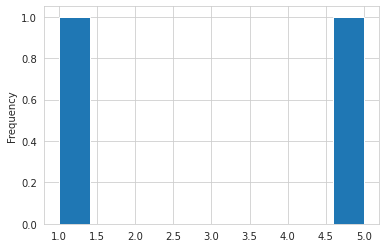

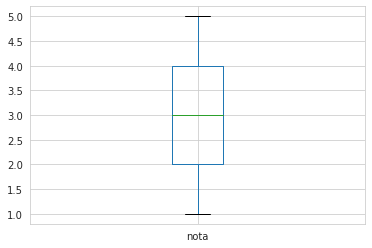

count    2.000000
mean     3.000000
std      2.828427
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
Name: nota, dtype: float64

In [27]:
plot_filme(484)

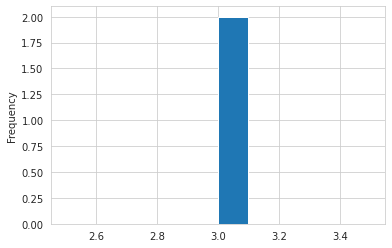

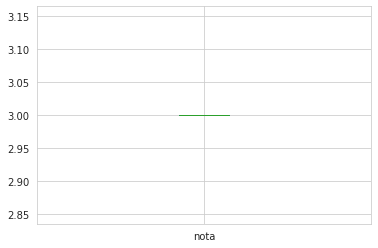

count    2.0
mean     3.0
std      0.0
min      3.0
25%      3.0
50%      3.0
75%      3.0
max      3.0
Name: nota, dtype: float64

In [28]:
plot_filme(49957)

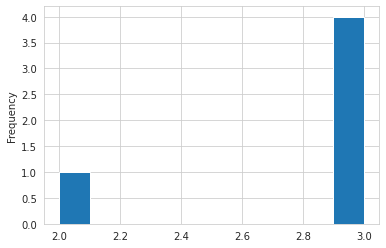

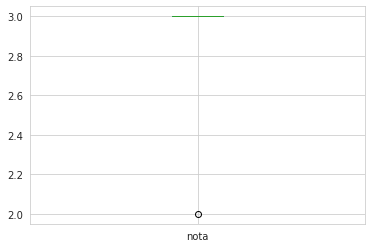

count    5.000000
mean     2.800000
std      0.447214
min      2.000000
25%      3.000000
50%      3.000000
75%      3.000000
max      3.000000
Name: nota, dtype: float64

In [53]:
plot_filme(458)

In [29]:
filmes_com_media_mediana_moda0_5

,filmeId,titulo,generos,media,mediana,moda
8263,105121,Inescapable (2012),Action|Drama|War,1.0,1.0,1
5178,8383,Hope Springs (2003),Comedy|Romance,1.0,1.0,1
2566,3433,Death Wish 4: The Crackdown (1987),Action|Drama,1.0,1.0,1
9727,190213,John From (2015),Drama,1.0,1.0,1
3076,4129,Made in Heaven (1987),Fantasy|Romance,1.0,1.0,1
...,...,...,...,...,...,...
9271,157172,Wizards of the Lost Kingdom II (1989),Action|Fantasy,0.5,0.5,0.5
7553,85334,Hard Ticket to Hawaii (1987),Action|Comedy,0.5,0.5,0.5
6503,53453,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi,0.5,0.5,0.5
5210,8494,"Cincinnati Kid, The (1965)",Drama,0.5,0.5,0.5


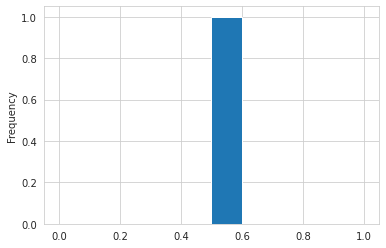

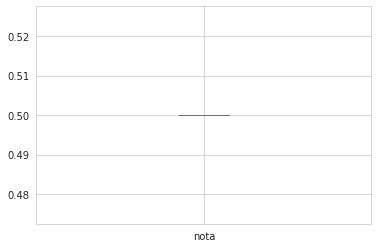

count    1.0
mean     0.5
std      NaN
min      0.5
25%      0.5
50%      0.5
75%      0.5
max      0.5
Name: nota, dtype: float64

In [30]:
plot_filme(71810)

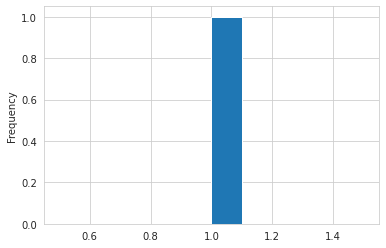

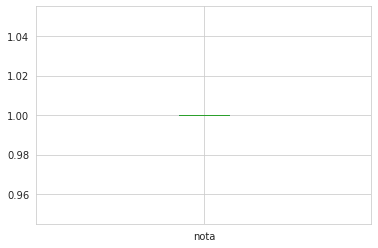

count    1.0
mean     1.0
std      NaN
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: nota, dtype: float64

In [54]:
plot_filme(8383)

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


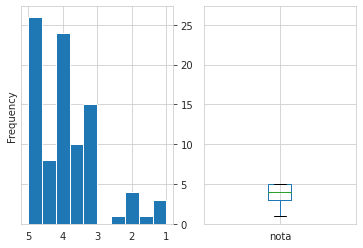

In [31]:
#fonte: https://stackoverflow.com/questions/44049132/python-pandas-plotting-two-barh-side-by-side

def plot_filme_v2(n):
  
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]

  fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

  ax.invert_xaxis()
  ax.yaxis.tick_right()

  notas_do_filme.plot(kind='hist', ax=ax)
  notas_do_filme.plot.box(ax=ax2)

  plt.show()


plot_filme_v2(919)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

Considerando o dataframe 'filmes_com_media'

In [33]:
filmes_com_media_ano = filmes_com_media.copy()

filmes_com_media_ano["ano_lanc"] =  filmes_com_media_ano["titulo"].str.extract('(\([0-9]{2,4}\)$)')

filmes_com_media_ano["ano_lanc"] = filmes_com_media_ano["ano_lanc"].str.extract('([0-9]{2,4})')

filmes_com_media_ano.head(5)

,filmeId,titulo,generos,nota_média,ano_lanc
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


In [35]:
serie_nota_media_por_ano = filmes_com_media_ano.groupby("ano_lanc")['nota_média'].mean()

serie_nota_media_por_ano

ano_lanc
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
1916    3.562500
          ...   
2014    3.110263
2015    3.069094
2016    3.103748
2017    3.376749
2018    3.372561
Name: nota_média, Length: 106, dtype: float64

In [36]:
dtf_nota_media_por_ano = serie_nota_media_por_ano.to_frame()

dtf_nota_media_por_ano.head(5)

,nota_média
ano_lanc,
1902,3.5000
1903,2.5000
1908,4.0000
1915,2.0000
1916,3.5625


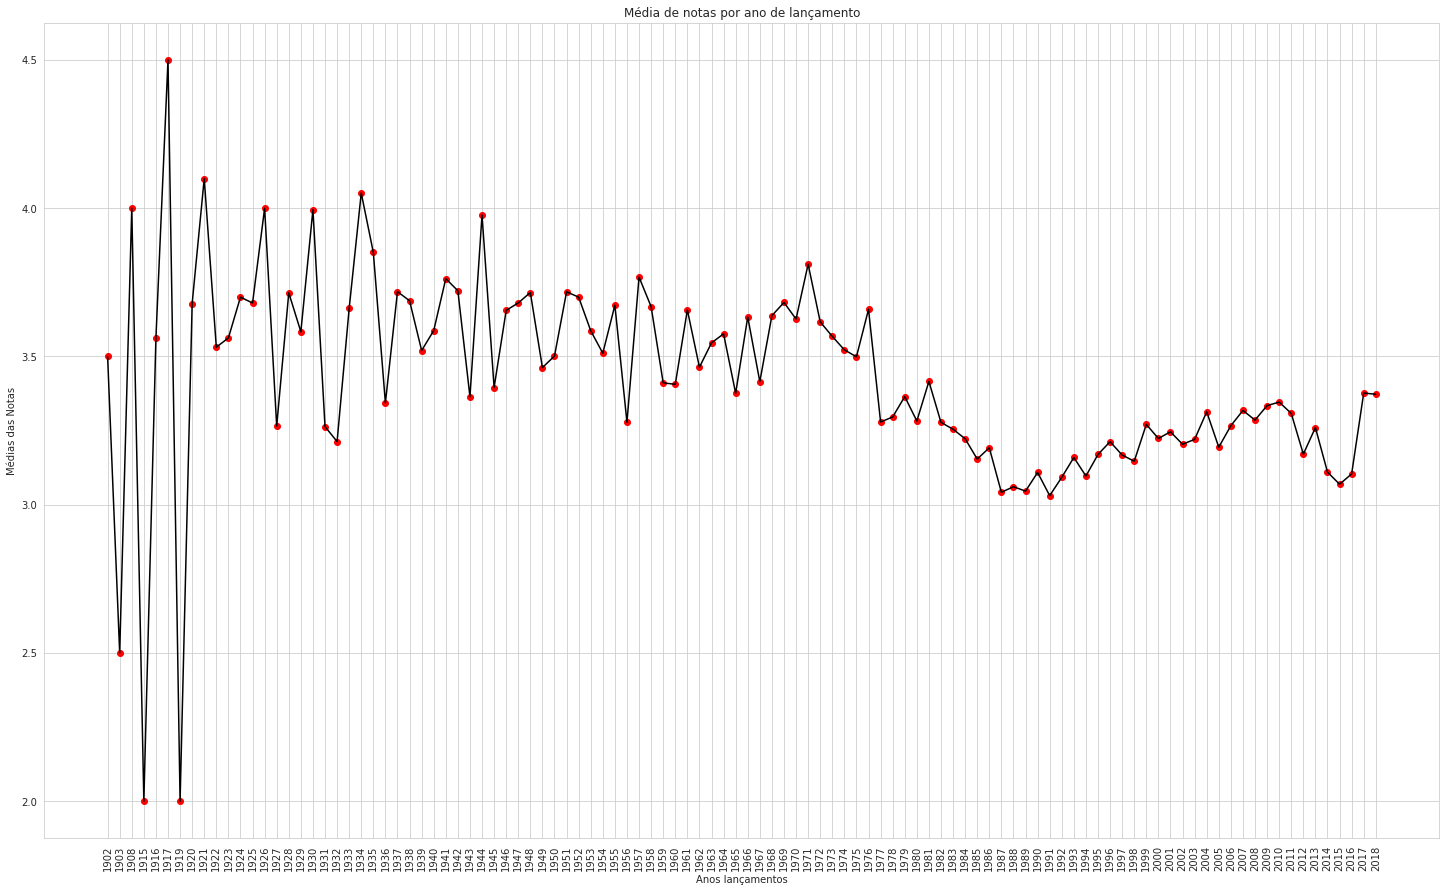

In [42]:
plt.figure(figsize=(25,15))
plt.title("Média de notas por ano de lançamento")
plt.xlabel("Anos lançamentos")
plt.ylabel("Médias das Notas")

plt.scatter(dtf_nota_media_por_ano.index, dtf_nota_media_por_ano.nota_média,  color="r")
plt.plot(dtf_nota_media_por_ano.index, dtf_nota_media_por_ano.nota_média, color="k")

plt.xticks(dtf_nota_media_por_ano.index, dtf_nota_media_por_ano.index, rotation='vertical')

plt.show()

## Desafio pessoal 1

Criar um gráfico com a média de notas de acordo com o ano de lançamento do filme mas considerando o momento em que foi feita essa avaliação.

In [0]:
#Função que obtém ano a partir do timestamp
def obtem_ano(int_timestamp):

  from datetime import datetime

  obj_data = datetime.fromtimestamp(int_timestamp)

  str_r = obj_data.strftime("%Y")

  return str_r
#Fim da função


In [44]:
#Cópia do dataframe de avaliações
dtf_avaliacoes_ano = avaliacoes.copy()

#Obtendo ano da avaliação
dtf_avaliacoes_ano["ano"] = dtf_avaliacoes_ano["momento"] 

dtf_avaliacoes_ano1 = dtf_avaliacoes_ano[["ano"]]

dtf_avaliacoes_ano1 = dtf_avaliacoes_ano1.applymap(obtem_ano)
 
dtf_avaliacoes_ano = dtf_avaliacoes_ano.join(dtf_avaliacoes_ano1, lsuffix="_esq")

dtf_avaliacoes_ano = dtf_avaliacoes_ano.drop(columns=['ano_esq'])

dtf_avaliacoes_ano

,usuarioId,filmeId,nota,momento,ano
0,1,1,4.0,964982703,2000
1,1,3,4.0,964981247,2000
2,1,6,4.0,964982224,2000
3,1,47,5.0,964983815,2000
4,1,50,5.0,964982931,2000
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017
100832,610,168248,5.0,1493850091,2017
100833,610,168250,5.0,1494273047,2017
100834,610,168252,5.0,1493846352,2017


In [45]:
#Série com médias de notas por ano
serie_avaliacoes_media_p_ano = dtf_avaliacoes_ano.groupby(by="ano")["nota"].mean()

serie_avaliacoes_media_p_ano

ano
1996    3.535927
1997    3.727557
1998    3.435897
1999    3.772448
2000    3.392506
2001    3.512239
2002    3.606958
2003    3.499377
2004    3.506099
2005    3.431533
2006    3.487928
2007    3.309039
2008    3.656746
2009    3.392496
2010    3.463494
2011    3.784024
2012    3.641323
2013    3.877404
2014    3.510771
2015    3.513830
2016    3.686334
2017    3.348805
2018    3.389062
Name: nota, dtype: float64

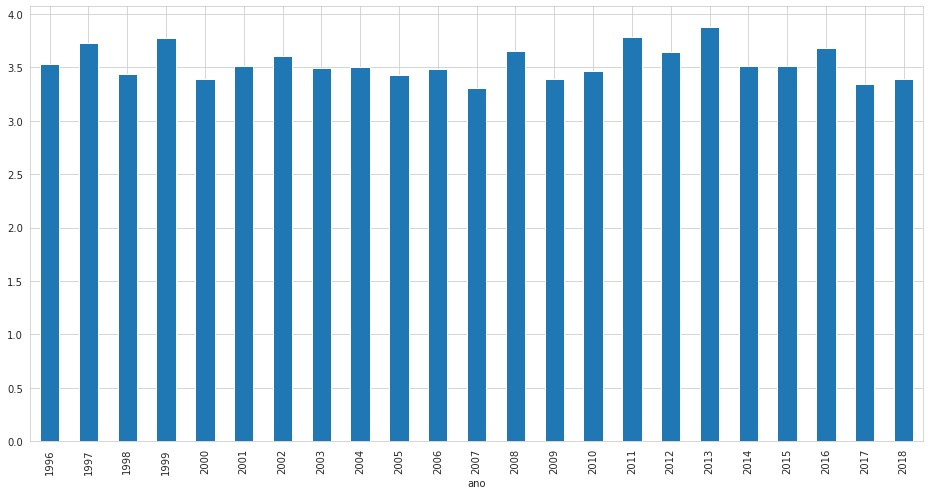

In [46]:
plt.figure(figsize=(16,8))
serie_avaliacoes_media_p_ano.plot(kind='bar', x=serie_avaliacoes_media_p_ano.index, y=serie_avaliacoes_media_p_ano.values)

In [0]:
#Cópia do dataset de filmes
dtf_filme  = filmes.copy()

#Obtendo ano de lançamento dos filmes
dtf_filme = dtf_filme[["titulo"]]

dtf_filme["ano_lanc"] =  dtf_filme["titulo"].str.extract('(\([0-9]{2,4}\)$)')

dtf_filme["ano_lanc"] = dtf_filme["ano_lanc"].str.extract('([0-9]{2,4})')

# Retirar anos nulos
dtf_filme = dtf_filme.dropna()

serie_ano_lanc_filmes  = dtf_filme["ano_lanc"]

arr_anos_lanc = serie_ano_lanc_filmes.unique()

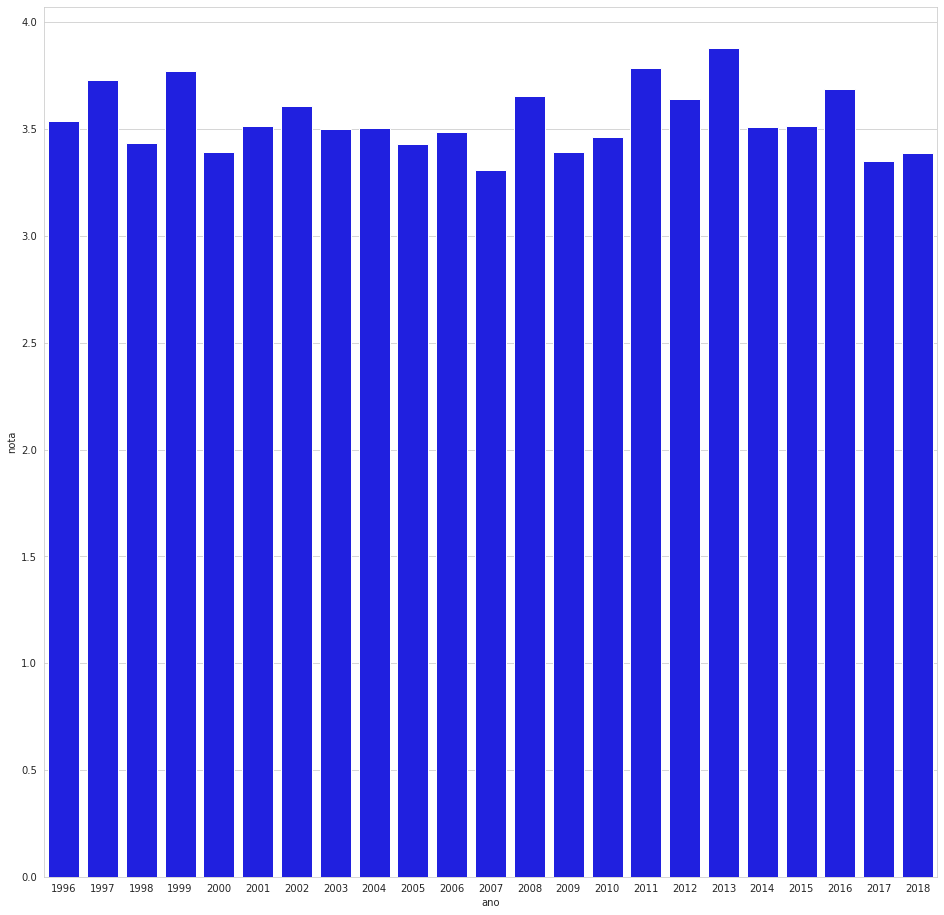

In [48]:
dtf_media_nota_avs = serie_avaliacoes_media_p_ano.to_frame()

dtf_media_nota_avs.reset_index(inplace=True)

dtf_media_nota_avs = dtf_media_nota_avs.query("ano in @arr_anos_lanc")

#serie_avaliacoes_media_p_ano

plt.figure(figsize=(16,16))

obj_boxplot = sns.barplot(x ="ano"  , y="nota", color="b",  data=dtf_media_nota_avs)

plt.show()

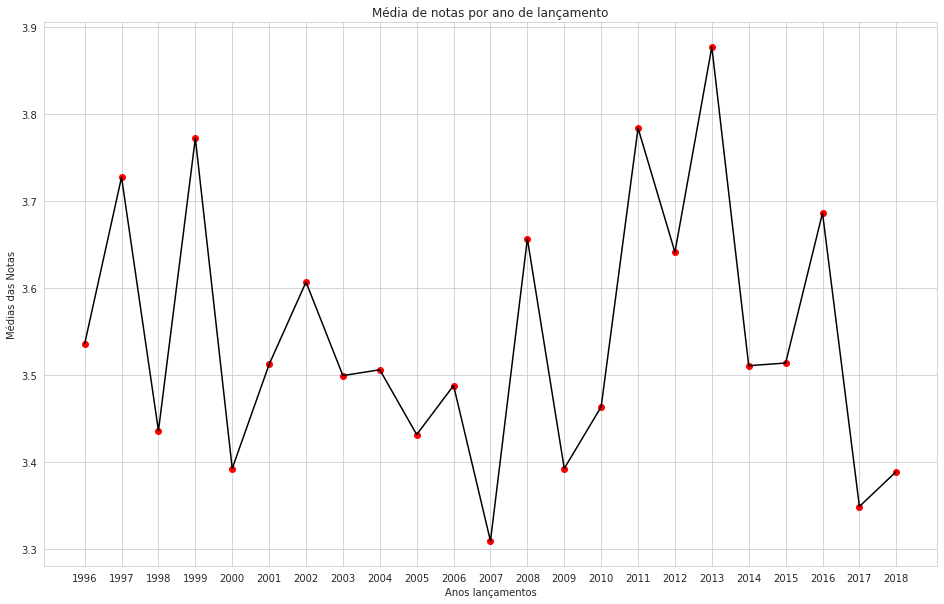

In [49]:
plt.figure(figsize=(16,10))
plt.title("Média de notas por ano de lançamento")
plt.xlabel("Anos lançamentos")
plt.ylabel("Médias das Notas")

plt.scatter(dtf_media_nota_avs.ano, dtf_media_nota_avs.nota,  color="r")
plt.plot(dtf_media_nota_avs.ano, dtf_media_nota_avs.nota, color="k")

plt.show()